<a href="https://colab.research.google.com/github/Hyewon0920/simple-machine-learning-project/blob/main/%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()

df = pd.DataFrame(california.data, columns = california.feature_names)
df["TARGET"] = california.target
df.tail()

scaler = StandardScaler()
scaler.fit(df.values[:,:-1])
df.values[:,:-1] = scaler.transform(df.values[:,:-1])

df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,TARGET
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826,0.781
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722,0.771
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713,0.923
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626,0.847
20639,-0.780129,-1.004309,-0.070443,0.138403,-0.033977,-0.043682,1.750146,-0.833696,0.894


In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [3]:
data = torch.from_numpy(df.values).float()

x = data[: , :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([20640, 8]) torch.Size([20640, 1])


In [4]:
n_epochs = 4000
batch_size = 256
print_interval = 200
#learning_rate = 1e-2

In [6]:
model = nn.Sequential(
    nn.Linear(x.size(-1), 6),
    nn.LeakyReLU(),
    nn.Linear(6,5),
    nn.LeakyReLU(),
    nn.Linear(5,4),
    nn.LeakyReLU(),
    nn.Linear(4,3),
    nn.LeakyReLU(),
    nn.Linear(3, y.size(-1))
)

print(model)

Sequential(
  (0): Linear(in_features=8, out_features=6, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=6, out_features=5, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=5, out_features=4, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=4, out_features=3, bias=True)
  (7): LeakyReLU(negative_slope=0.01)
  (8): Linear(in_features=3, out_features=1, bias=True)
)


In [8]:
optimizer = optim.Adam(model.parameters())


In [10]:
for i in range(n_epochs) :
  indices = torch.randperm(x.size(0))
  x_ = torch.index_select(x, dim=0, index= indices)
  y_ = torch.index_select(y, dim=0, index = indices)

  x_ = x_.split(batch_size, dim = 0)
  y_ = y_.split(batch_size, dim = 0)

  y_hat = []
  total_loss = 0

  for x_i, y_i in zip(x_,y_) :
    y_hat_i = model(x_i)
    loss = F.mse_loss(y_hat_i, y_i)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    total_loss += float(loss)
    y_hat += [y_hat_i]

  total_loss = total_loss / len(x_)
  if (i+1)%print_interval == 0 :
    print('Epoch %d : loss = %4e'%(i+1, total_loss))

y_hat = torch.cat(y_hat, dim=0)
y = torch.cat(y_, dim=0)

Epoch 200 : loss = 3.415674e-01
Epoch 400 : loss = 3.290996e-01
Epoch 600 : loss = 3.279728e-01
Epoch 800 : loss = 3.079424e-01
Epoch 1000 : loss = 3.069565e-01
Epoch 1200 : loss = 3.034869e-01
Epoch 1400 : loss = 3.018380e-01
Epoch 1600 : loss = 3.013742e-01
Epoch 1800 : loss = 3.005763e-01
Epoch 2000 : loss = 2.999470e-01
Epoch 2200 : loss = 2.994176e-01
Epoch 2400 : loss = 2.981546e-01
Epoch 2600 : loss = 2.975274e-01
Epoch 2800 : loss = 2.963936e-01
Epoch 3000 : loss = 2.919513e-01
Epoch 3200 : loss = 2.914940e-01
Epoch 3400 : loss = 2.904567e-01
Epoch 3600 : loss = 2.890892e-01
Epoch 3800 : loss = 2.880327e-01
Epoch 4000 : loss = 2.897256e-01


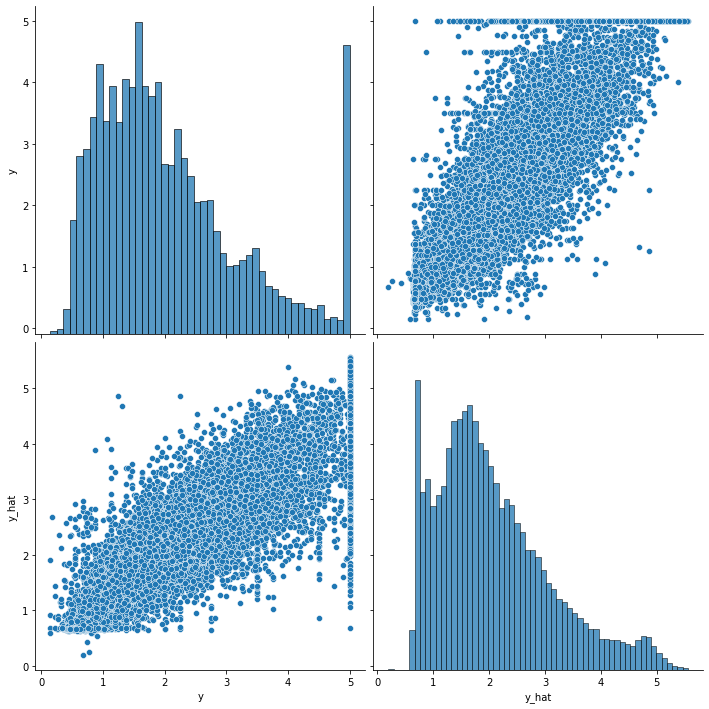

In [12]:
data = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach().numpy(), columns = ["y", "y_hat"])

sns.pairplot(data, height = 5)
plt.show()